In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,Dense,Flatten,BatchNormalization,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Cats&Dogs/train.zip' -d '/content/drive/MyDrive/Cats&Dogs/train'

In [ ]:
!os.chdir('/content/drive/MyDrive/Cats&Dogs/train/train')

/bin/bash: -c: line 0: syntax error near unexpected token `'/content/drive/MyDrive/Cats&Dogs/train/train''
/bin/bash: -c: line 0: `os.chdir('/content/drive/MyDrive/Cats&Dogs/train/train')'


In [ ]:
train_path=Path('/content/drive/MyDrive/Cats&Dogs/train/train')
if train_path.exists():
  for i in train_path.glob('*'):
      if i.suffix!='.jpg' or (i.stat().st_size <= 1):
       print(i)
        
      


/content/drive/MyDrive/Cats&Dogs/train/train/dogs
/content/drive/MyDrive/Cats&Dogs/train/train/cats


In [ ]:
train_batches=ImageDataGenerator(rescale=1.0/255,rotation_range=0.4,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest').flow_from_directory(directory=train_path,color_mode="rgb",target_size=(64,64))
valid_batches=ImageDataGenerator(rescale=1.0/255,validation_split=0.1).flow_from_directory( directory=train_path,subset="validation",color_mode="rgb",target_size=(64,64))

Found 5985 images belonging to 2 classes.
Found 598 images belonging to 2 classes.


In [ ]:
model=Sequential([
                  
          Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(32,(3,3),activation='relu'),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(64,(3,3),activation='relu'),
          MaxPool2D(pool_size=(2,2)),
          Flatten(),
          Dense(512,activation='relu'),
          Dense(2,activation='softmax'),   
            
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches,validation_data=valid_batches,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
188/188 [==============================] - 39s 206ms/step - loss: 0.3983 - accuracy: 0.8369 - val_loss: 0.4262 - val_accuracy: 0.8411
Epoch 2/20
188/188 [==============================] - 42s 224ms/step - loss: 0.3999 - accuracy: 0.8374 - val_loss: 0.3866 - val_accuracy: 0.8361
Epoch 3/20
188/188 [==============================] - 39s 207ms/step - loss: 0.3966 - accuracy: 0.8391 - val_loss: 0.3856 - val_accuracy: 0.8361
Epoch 4/20
188/188 [==============================] - 38s 203ms/step - loss: 0.3957 - accuracy: 0.8398 - val_loss: 0.4117 - val_accuracy: 0.8411
Epoch 5/20
188/188 [==============================] - 38s 202ms/step - loss: 0.3877 - accuracy: 0.8394 - val_loss: 0.3830 - val_accuracy: 0.8378
Epoch 6/20
188/188 [==============================] - 38s 201ms/step - loss: 0.3876 - accuracy: 0.8406 - val_loss: 0.3726 - val_accuracy: 0.8378
Epoch 7/20
188/188 [==============================] - 38s 201ms/step - loss: 0.3866 - accuracy: 0.8388 - val_loss: 0.3913 - val_ac

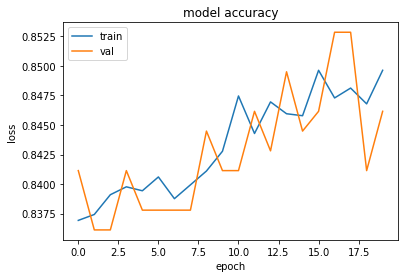

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

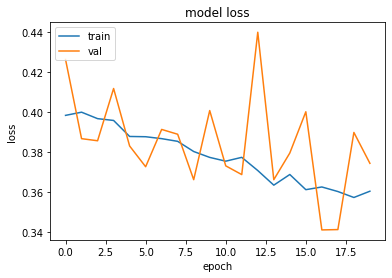

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
class_names = ['cats','dogs']

The Image Is A cats With A Probability Of 73.10%.


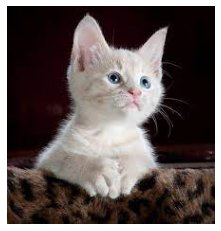

In [ ]:
from tensorflow.keras.preprocessing import image

path="/content/drive/MyDrive/Face_Classifier/download.jpg"
img=image.load_img(path)
plt.imshow(img)
plt.axis("off")
img=img.resize((64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.array(x)
predictions = model.predict(images)
score = tf.nn.softmax(predictions)
print(f"The Image Is A {class_names[np.argmax(score)]} With A Probability Of {100*np.max(score):.2f}%.")

The Image Is A dogs With A Probability Of 73.11%.


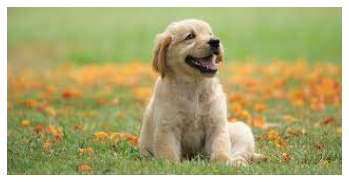

In [ ]:
from tensorflow.keras.preprocessing import image

path="/content/drive/MyDrive/Face_Classifier/download (1).jpg"

img=image.load_img(path)
plt.imshow(img)
plt.axis("off")
img=img.resize((64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.array(x)
predictions = model.predict(images)
score = tf.nn.softmax(predictions)
print(f"The Image Is A {class_names[np.argmax(score)]} With A Probability Of {100*np.max(score):.2f}%.")